## LGBM & XGBM

#### Objective:
##### The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Exploratory Data Analysis (EDA):

##### 1.	Load the Titanic dataset using Python's pandas library.

In [2]:
train = pd.read_csv("Titanic_train.csv")
test =pd.read_csv("Titanic_test.csv")                   

In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

##### 2.	Check for missing values.

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### We can observe that

* Age column has a lot of null values but since age could be an important factor in our prediction of survivors so we'll avoid filling it with any mean value or removing the entire column, instead we'll just remove the rows.
* Cabin has a lot of null values in training and testing set so we'll be removing that column.
* Embarked has only 2 null values and since it's a categorical column we'll be filling it with mode value
* testing set fare value we'll fill with mean value.

##### 3.	Explore data distributions using histograms and box plots.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'PassengerId'),
  Text(1, 0, 'Survived'),
  Text(2, 0, 'Pclass'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'SibSp'),
  Text(5, 0, 'Parch'),
  Text(6, 0, 'Fare')])

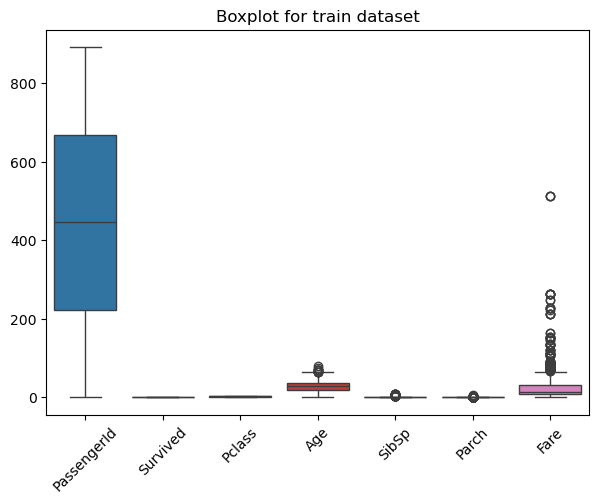

In [7]:
plt.figure(figsize=(7,5))
sns.boxplot(train)
plt.title("Boxplot for train dataset")
plt.xticks(rotation=45)

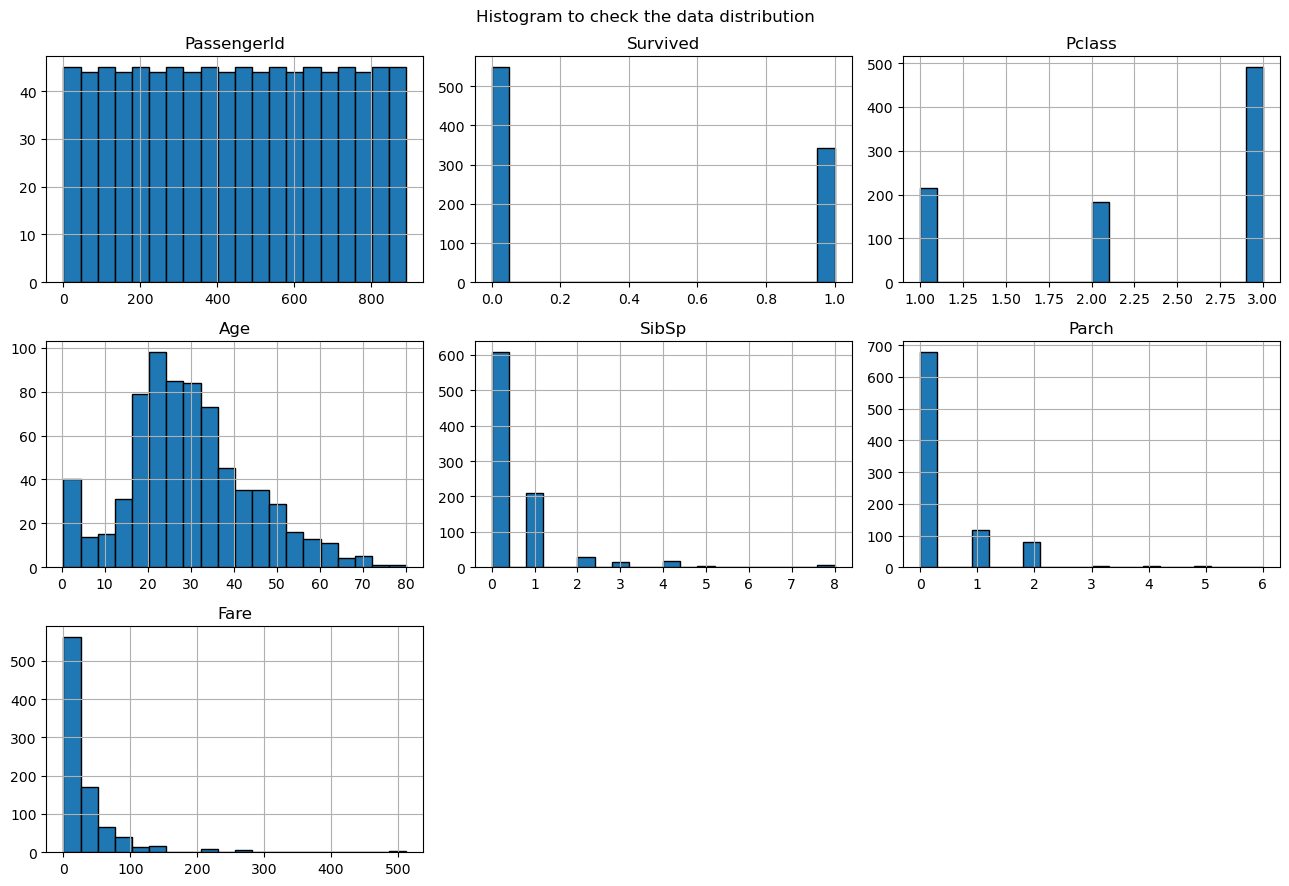

In [8]:
train.hist(figsize=(13,9),bins=20,edgecolor='black')
plt.suptitle("Histogram to check the data distribution")
plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'PassengerId'),
  Text(1, 0, 'Pclass'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'SibSp'),
  Text(4, 0, 'Parch'),
  Text(5, 0, 'Fare')])

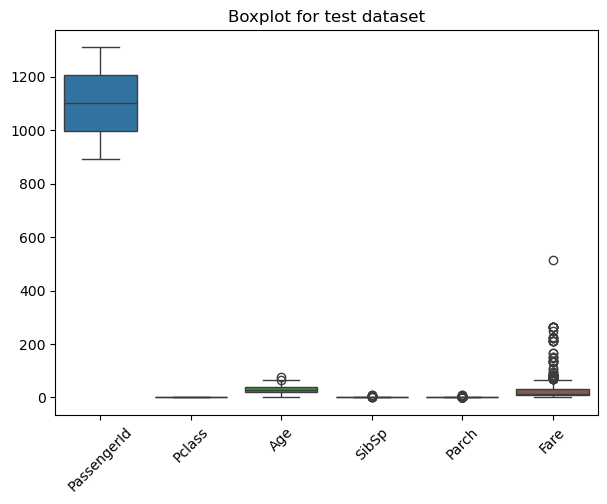

In [9]:
plt.figure(figsize=(7,5))
sns.boxplot(test)
plt.title("Boxplot for test dataset")
plt.xticks(rotation=45)

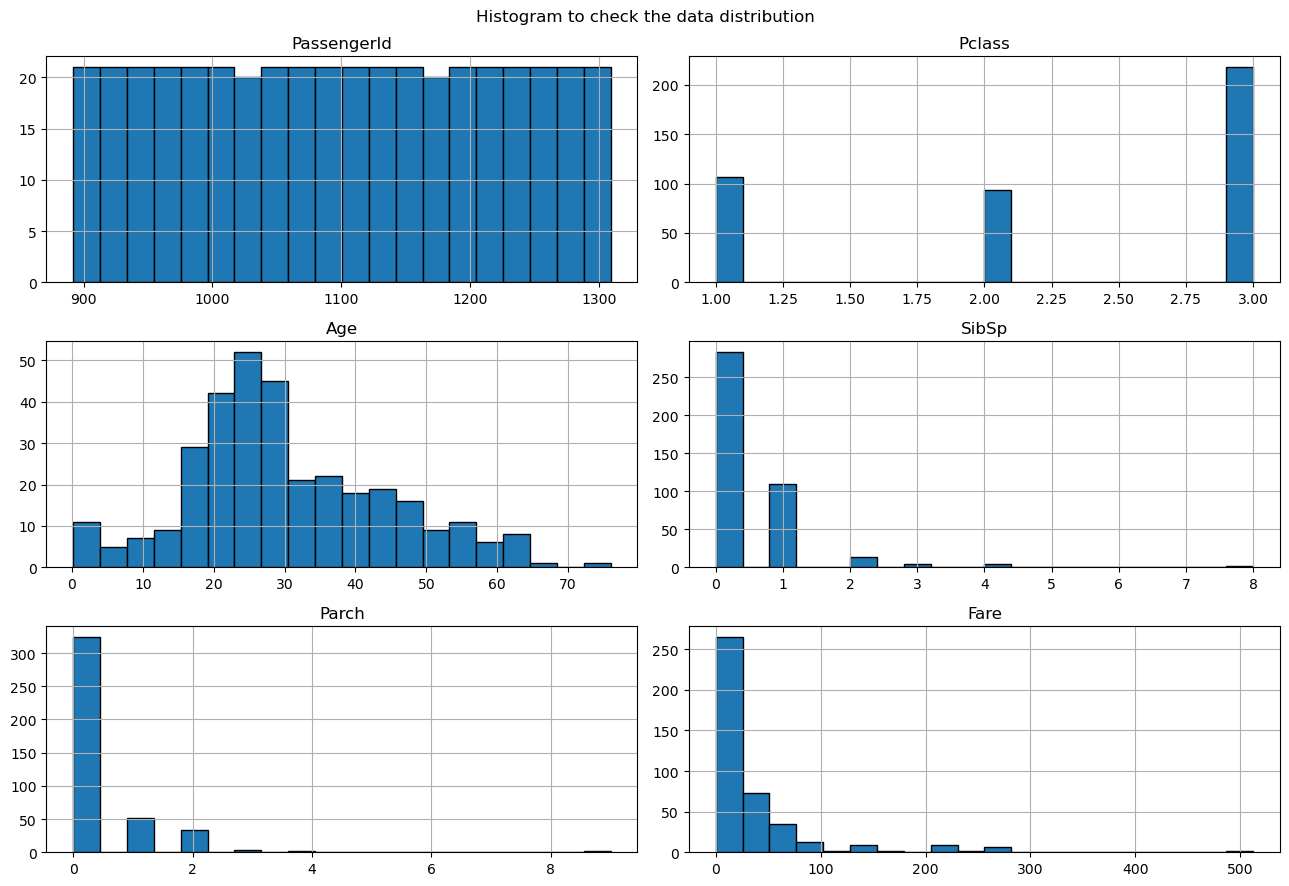

In [10]:
test.hist(figsize=(13,9),bins=20,edgecolor='black')
plt.suptitle("Histogram to check the data distribution")
plt.tight_layout()
plt.show()

from boxplot data distributions we can see say that there are minimum number of outliers which we can neglet it as it has no effect to the data set

* We can see features like survived and Sibsp are two tailed
* Features like Pclass, Parch are one tailed
* Features like Fare, Age are one tailed

##### 4.	Visualize relationships between features and survival using scatter plots and bar plots.

In [11]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
num_col=[i for i in train.columns if train[i].dtype!='O']
num_col

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [13]:
features =['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

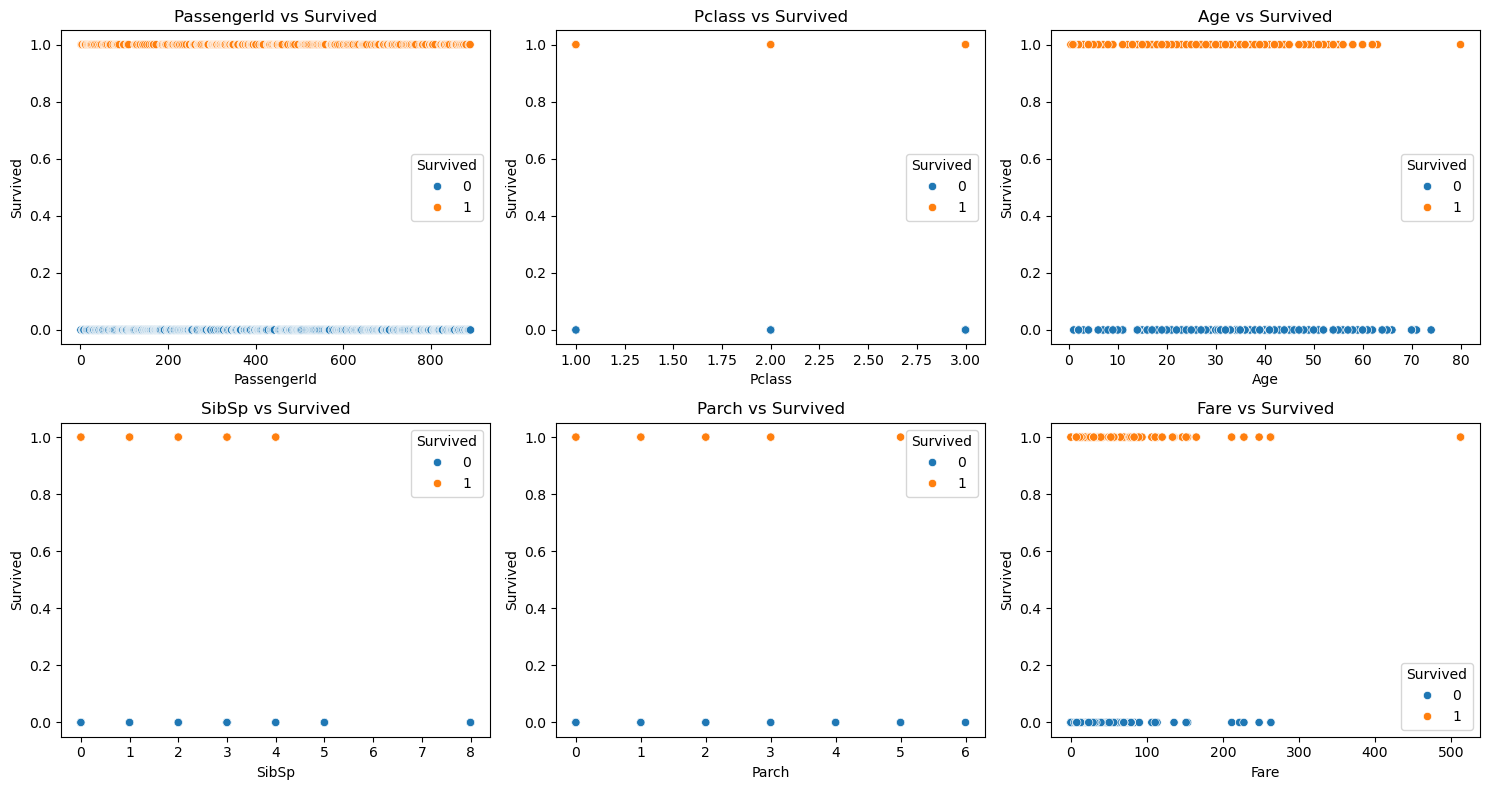

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for ax, feature in zip(axes.flat, features):
    sns.scatterplot(x=feature, y='Survived', hue='Survived', data=train, ax=ax)
    ax.set_title(f'{feature} vs Survived')

plt.tight_layout()
plt.show()

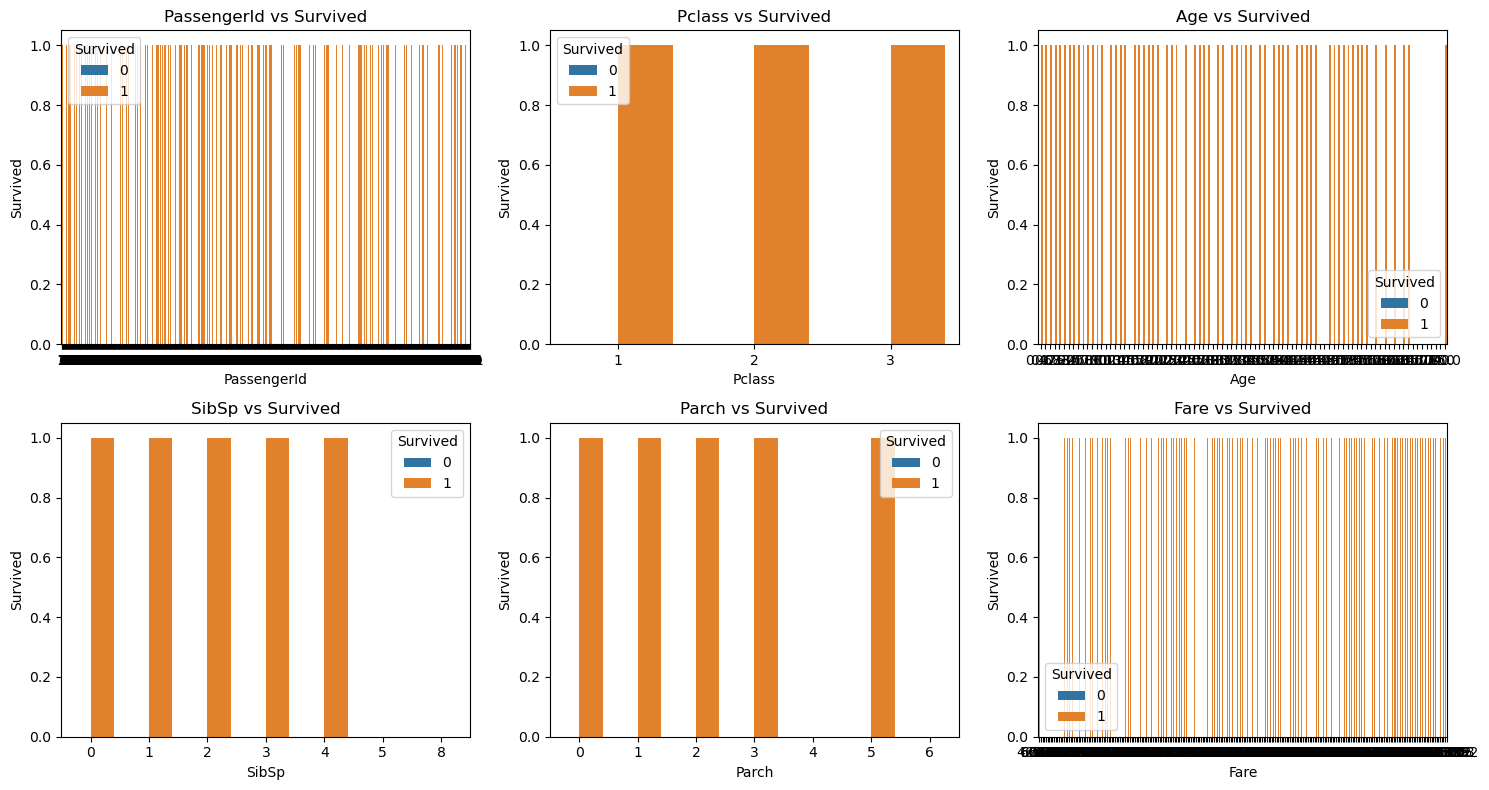

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for ax, feature in zip(axes.flat, features):
    sns.barplot(x=feature, y='Survived', hue='Survived', data=train, ax=ax)
    ax.set_title(f'{feature} vs Survived')

plt.tight_layout()
plt.show()

### Data Preprocessing:

#### 1.	Impute missing values.

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We discussed above we will be:

* Age column has a lot of null values but since age could be an important factor in our prediction of survivors so we'll avoid filling it with any mean * value or removing the entire column, instead we'll just remove the rows.
* Cabin has a lot of null values in training and testing set so we'll be removing that column.
* Embarked has only 2 null values and since it's a categorical column we'll be filling it with mode value
* Testing set fare value we'll fill with mean value.

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
#Removing Cabin column from train and test
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)
train.shape, test.shape

((891, 11), (418, 10))

In [20]:
#Filling the null values of Embarked and Fare
mod_val = train['Embarked'].mode()[0]           #getting the mode value of embarked column
# The mode value of Embarked column is S.

train['Embarked'].fillna(mod_val)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [22]:
# dropping rows with age as null vlaues
train.dropna(axis=0,inplace=True)
test.dropna(axis=0,inplace=True)

#### 2.	Encode categorical variables using one-hot encoding or label encoding. 

In [23]:
cat_col=[i for i in train.columns if train[i].dtype=='O']
cat_col

['Name', 'Sex', 'Ticket', 'Embarked']

In [24]:
print(train[cat_col].nunique())

Name        712
Sex           2
Ticket      541
Embarked      3
dtype: int64


In [37]:
#we'll be converting sex and embarked using label encoder in both train and test data
from sklearn.preprocessing import LabelEncoder

encode_cols = ['Sex','Embarked']             #denings the names of the column where we need to convert
for col in encode_cols:                      # running the loop through all the columns defined in the list
    le = LabelEncoder()                      # calling the label encoder method
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])


#### Building Predictive Models:

#### 1.	Split the preprocessed dataset into training and testing sets.

In [38]:
#Let's extract relevant features for model training
x = train.drop(['PassengerId','Name','Ticket','Survived'], axis=1)
y = train['Survived']
x.shape, y.shape

((712, 7), (712,))

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((569, 7), (143, 7), (569,), (143,))

##### 2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.

In [40]:
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score

#### 3.	Build predictive models using LightGBM and XGBoost algorithms.

In [32]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 699.0 kB/s eta 0:03:34
   ---------------------------------------- 0.5/150.0 MB 699.0 kB/s eta 0:03:34
   ---------------------------------------- 0.5/150.0 MB 699.0 kB/s eta 0:03:34
   ---------------------------------------- 0.8/15

In [41]:
#building xgbclassifier model
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [34]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 197.4 kB/s eta 0:00:05
   -------------- ------------------------- 0.5/1.5 MB 197.4 kB/s eta 0:00:05
   -------------- ------------------------- 0.5/1.5 MB 197.4 kB/s eta 0:00:05
   -------------- ------------------------- 0.5/1.5 MB 197.4 kB/s eta 0:00:05
   -------------- ------------------------- 0.5/1.5 MB 197.4 kB/s eta 0:00:05
   -------------- ------------------------- 0.5/1.5 MB 197

In [43]:
#building lgbmclassifier model
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier()
lgb_model

LGBMClassifier()

#### 4. Train the models on the training set and evaluate their performance on the testing set.

In [44]:
#training xgbmodel
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [45]:
# Let's check the performance of our xgbmodel on testing data
print("Testing Accuracy Score : ",accuracy_score(xgb_model.predict(x_test), y_test))
print("Testing Precision Score : ",precision_score(xgb_model.predict(x_test), y_test))
print("Testing Recall Score : ",recall_score(xgb_model.predict(x_test), y_test))
print("Testing F1 Score : ",f1_score(xgb_model.predict(x_test), y_test))

Testing Accuracy Score :  0.7622377622377622
Testing Precision Score :  0.6825396825396826
Testing Recall Score :  0.7543859649122807
Testing F1 Score :  0.7166666666666667


In [46]:
#training lgbm model
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 225, number of negative: 344
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 184
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.395431 -> initscore=-0.424541
[LightGBM] [Info] Start training from score -0.424541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [47]:
# Let's check the performance of our lgbmodel on testing data
print("Testing Accuracy Score : ",accuracy_score(lgb_model.predict(x_test), y_test))
print("Testing Precision Score : ",precision_score(lgb_model.predict(x_test), y_test))
print("Testing Recall Score : ",recall_score(lgb_model.predict(x_test), y_test))
print("Testing F1 Score : ",f1_score(lgb_model.predict(x_test), y_test))

Testing Accuracy Score :  0.7972027972027972
Testing Precision Score :  0.6984126984126984
Testing Recall Score :  0.8148148148148148
Testing F1 Score :  0.7521367521367521


#### 5. Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [48]:
#Implementing Crossvalidation for xgb and lgbm models
from sklearn.model_selection import cross_val_score

xgb_cv_score = cross_val_score(xgb_model, x_train, y_train, cv=5, scoring='accuracy')
lgb_cv_score = cross_val_score(lgb_model, x_train, y_train, cv=5, scoring='accuracy')

[LightGBM] [Info] Number of positive: 180, number of negative: 275
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.395604 -> initscore=-0.423814
[LightGBM] [Info] Start training from score -0.423814
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [49]:
print("XGBClassifier CV Accuracy :",xgb_cv_score.mean())
print("LGBMClassifier CV Accuracy :",lgb_cv_score.mean())

XGBClassifier CV Accuracy : 0.7856078248719143
LGBMClassifier CV Accuracy : 0.7996584381307251


In [50]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

xgb_param_grid = {
    'n_estimators':[50, 100, 200],
    'max_depth':[3, 5, 7],
    'learning_rate':[0.01, 0.1, 0.2],
    'subsample':[0.7, 0.8, 1.0],
    'colsample_bytree':[0.6, 0.8, 1.0]
}

#xgb with GridSearchCV
xgb = XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(estimator = xgb, param_grid = xgb_param_grid, scoring='accuracy', cv=5, verbose=1)
xgb_grid.fit(x_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [52]:
#Finding best params score for xgb using GridSearchCV
print('Best Parameters for XGBClassifier :', xgb_grid.best_params_)
print('Best Cross Validation Accuracy :', xgb_grid.best_score_)

Best Parameters for XGBClassifier : {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best Cross Validation Accuracy : 0.8277907157273715


In [53]:
# GridSearchCV was taking a lot of time to process for LGBM so we'll be implementing hyperparamete tuning usin RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV

#defining parameters
lgbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [20, 31, 50],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

#defining model
lgbm = LGBMClassifier(random_state=42)

# LGBMClassifier implmenting using Random Search CV
lgbm_random = RandomizedSearchCV(estimator=lgbm, param_distributions=lgbm_param_grid, 
                                n_iter=50, scoring='accuracy', cv=5, verbose=1, random_state=42)
lgbm_random.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 180, number of negative: 275
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.395604 -> initscore=-0.423814
[LightGBM] [Info] Start training from score -0.423814
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_iter=50,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200],
                                        'num_leaves': [20, 31, 50],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [54]:
#Finding best params score
print('Best Parameters for LGBMClassifier (RandomizedSearchCV):', lgbm_random.best_params_)
print('Best Cross Validation Accuracy :', lgbm_random.best_score_)

Best Parameters for LGBMClassifier (RandomizedSearchCV): {'subsample': 0.8, 'num_leaves': 31, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
Best Cross Validation Accuracy : 0.8189877348237851


In [55]:
# Let's check the accuracy of best models

xgb_best = xgb_grid.best_estimator_
lgbm_best = lgbm_random.best_estimator_

xgb_test_accuracy = xgb_best.score(x_test, y_test)
lgbm_test_accuracy = lgbm_best.score(x_test, y_test)

print("XGBClassifier Best Model Score:", xgb_test_accuracy)
print("LGBMClassifier Best Model Score:", lgbm_test_accuracy)

XGBClassifier Best Model Score: 0.8041958041958042
LGBMClassifier Best Model Score: 0.8111888111888111


#### Accuracy Scores of all the models

Default Models Accuracy
* Normal XGBClassifier Accuracy Score: 0.7972027972027972
* Normal LGBMClassifier Accuracy Score: 0.7902097902097902

Cross Validation Scores
* XGBClassifier CV Accuracy : 0.807353165522502
* LGBMClassifier CV Accuracy : 0.817864225781846

Tuned Model Accuracy
* XGBClassifier Test Accuracy: 0.7902097902097902
* LGBMClassifier Test Accuracy: 0.7972027972027972

There's not much difference even after hyperparameter tuning meaning the the default model chosen is the best model

##### Comparative Analysis:
1. Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

Accuracy of XGBClassifier
* Testing Accuracy Score : 0.7972027972027972
* Testing Precision Score : 0.6964285714285714
* Testing Recall Score : 0.7647058823529411
* Testing F1 Score : 0.7289719626168224

Accuracy of LGBMClassifier
* Testing Accuracy Score : 0.7902097902097902
* Testing Precision Score : 0.6964285714285714
* Testing Recall Score : 0.75
* Testing F1 Score : 0.7222222222222222

##### 2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

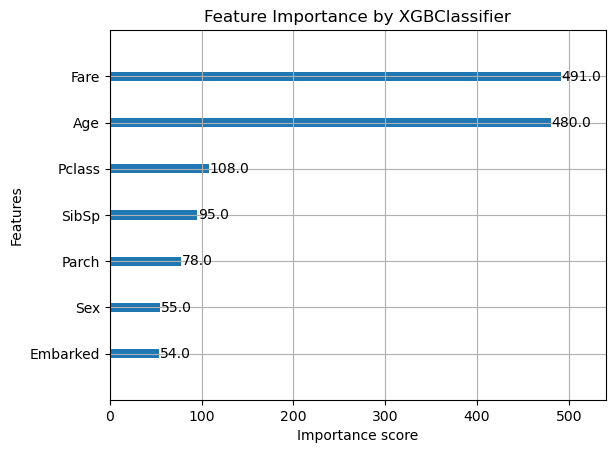

In [56]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_best)
plt.title("Feature Importance by XGBClassifier")
plt.xlabel
plt.show()

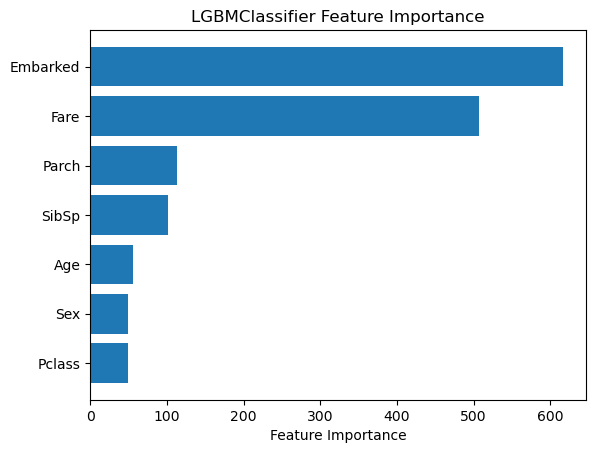

In [57]:
import matplotlib.pyplot as plt

importances = np.sort(lgbm_best.feature_importances_)
plt.barh(x.columns, importances)
plt.xlabel('Feature Importance')
plt.title('LGBMClassifier Feature Importance')
plt.show()

We can observe here several things:

* Most important feature for xgb is Age where as for lgbm it is Embarked
* Fare is the next important factor for both xgb and lgbm
* Parch is given the least priority in xgb where as in lgbm Pclass is considered the least important feature
* There quite dfference in the learning of both the models, although they both yield same type of result in the end their baisis of learning and working is very different.

Strengths of Each Model:

XGBClassifier:
* May excel in datasets with complex non-linear relationships due to its handling of gradient boosting.
* Slightly more robust to overfitting when properly tuned.
    
LGBMClassifier:
* Often faster in training and prediction due to its use of histogram-based learning.
* Performs well with large datasets and categorical features.
    
Weaknesses of Each Model:
XGBClassifier:
* Tends to be slower compared to LightGBM, especially for large datasets.
* Sensitive to hyperparameter tuning for optimal performance.
LGBMClassifier:
* May underperform if the dataset is small or lacks sufficient features for its histogram-based splits.
*Slightly more sensitive to imbalanced datasets without proper sampling or weighting.
    
Practical Implications
When to Use XGBClassifier?
* Ideal for small to medium-sized datasets with complex non-linear patterns.
* Suitable when training time is less critical, and the focus is on maximizing performance with proper hyperparameter tuning.
    
When to Use LGBMClassifier?
* Best for large datasets or when computational efficiency is a priority.
* Particularly useful for datasets with categorical features and cases where speed is critical.

##### Conclusion

* The LGBMClassifier emerges as a slightly better model in this comparison due to its marginally higher accuracy and faster training time, making it more practical for real-world applications.
* However, the XGBClassifier remains a strong alternative, especially for datasets requiring intricate pattern recognition.
* The choice of the model ultimately depends on the specific requirements of the task, such as the importance of computational efficiency, dataset size, and the need for interpretability.